Accuracy: 0.0

Classification Report:
              precision    recall  f1-score   support

        4348       0.00      0.00      0.00       2.0
        4375       0.00      0.00      0.00       1.0
        4400       0.00      0.00      0.00       0.0
        4444       0.00      0.00      0.00       2.0
        4545       0.00      0.00      0.00       0.0
        5109       0.00      0.00      0.00       1.0
        5234       0.00      0.00      0.00       1.0
        5685       0.00      0.00      0.00       1.0
        5906       0.00      0.00      0.00       1.0
        6433       0.00      0.00      0.00       1.0
        6566       0.00      0.00      0.00       1.0
        7644       0.00      0.00      0.00       1.0
        7929       0.00      0.00      0.00       1.0
        8235       0.00      0.00      0.00       0.0
        8507       0.00      0.00      0.00       1.0
        8592       0.00      0.00      0.00       1.0
        8847       0.00      0.00      0.00

C:\Users\varad\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\varad\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\varad\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

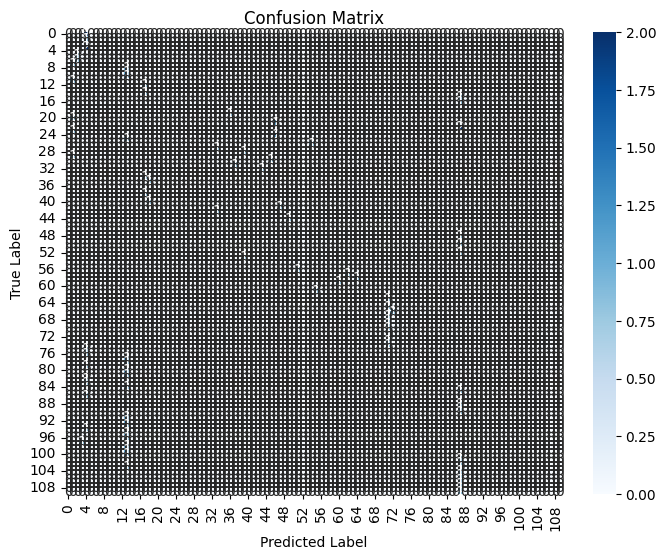

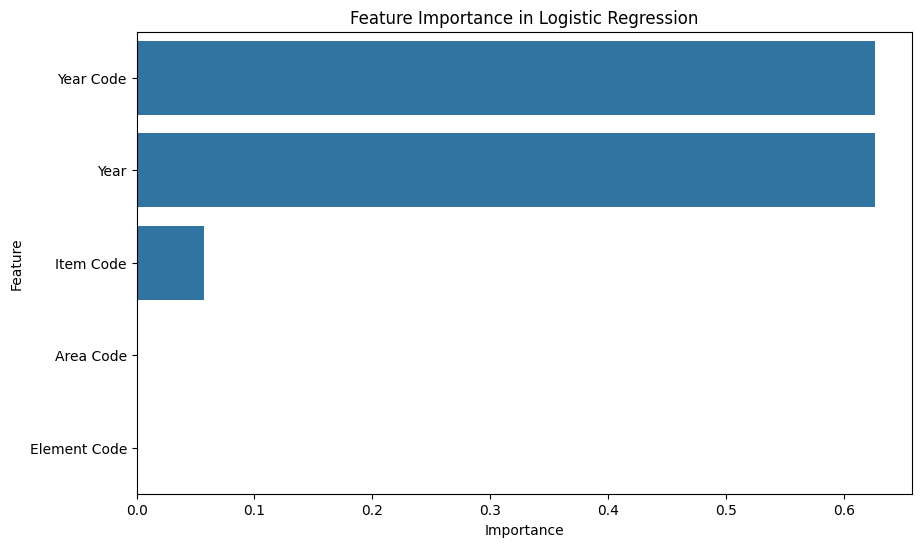

C:\Users\varad\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


ValueError: X has 10 features, but StandardScaler is expecting 5 features as input.

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Read the dataset
df = pd.read_csv('hair_loss.csv')

# Separate features and target
X = df.drop('hair_fall', axis=1)
y = df['hair_fall']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train logistic regression model
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Print model performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': abs(model.coef_[0])
})
feature_importance = feature_importance.sort_values('Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance in Logistic Regression')
plt.show()

# Make a sample prediction
sample_data = np.array([[312, 100, 1400, 249, 87, 55, 333, 44, 41, 368]])
sample_scaled = scaler.transform(sample_data)
prediction = model.predict(sample_scaled)
probability = model.predict_proba(sample_scaled)

print("\nSample Prediction:")
print("Predicted Class:", prediction[0])
print("Probability Distribution:", probability[0])
